# Survey1(TIME, CONCERTO), General Model, BG remove

### basic info

In [1]:
#
from sparse_tools import *
from survey_params import *

datadir = '/Volumes/Drive/sim_cii/data_sparse/gen/'
survey_param = survey1_param()
dth = survey_param.dth
nu_binedges = survey_param.nu_binedges
nu_bins = survey_param.nu_bins
line_use = [0,2,3,4,5,6]
line_name_arr = ['CII', 'CO(2-1)', 'CO(3-2)', 'CO(4-3)', 'CO(5-4)', 'CO(6-5)']
nu0_arr = [spec_lines.CII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(2).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(3).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(4).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(5).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(6).to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use

In [2]:
with open('data_internal/sparse_S1_dict.pickle','rb') as pfile:
    A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all = pickle.load(pfile)

### lightcone params

In [3]:
Neff_arr = [1]
sigI_arr = [1e3, 5e3, 1e4, 5e4]
sig_th_arr = [1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10]
N_lc = 2500
N_sim = 100

param_dict = {}
param_dict['Neff'] = Neff_arr
param_dict['sigI'] = sigI_arr
param_dict['sig_th'] = sig_th_arr
with open(datadir + 'S1_param_dict.pickle','wb') as pfile:
    pickle.dump(param_dict, pfile)

### Generate ligh cones

In [4]:
iNeff = 0
N_true = np.load(datadir + 'N_true%d.npy'%iNeff)
Itrue_all = np.load(datadir + 'Itrue_all%d.npy'%iNeff)
Itrue_targ = np.load(datadir + 'Itrue_targ%d.npy'%iNeff)

### run MP

skip this cell

=================

#### Remove constant in map

In [9]:
# for i,sigI in enumerate(sigI_arr):
#     for _,(j,sig_th) in enumerate(zip([6],[sig_th_arr[6]])):#enumerate(sig_th_arr):
#         print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))
#         Ipred_targ_arr = np.zeros([N_sim]+list(Itrue_targ.shape))
#         for isim in range(N_sim):
#             Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
#             Iobs_all -= np.mean(Iobs_all)
#             N_pred = run_MP_sig(A, I_norm, Iobs_all, sigI, sig_th)
#             _, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
#                                       nu_binedges, line_use, line_targ_vec, verbose = 0)    
#             Ipred_targ_arr[isim] = Ipred_targ
#             print(isim)
#         np.save(datadir + 'Ipred_targ_arr%d%d%d_bg0'%(iNeff, i, j),Ipred_targ_arr)

#### Remove slope in map

In [8]:
# for i,sigI in enumerate(sigI_arr):
#     for _,(j,sig_th) in enumerate(zip([6],[sig_th_arr[6]])):#enumerate(sig_th_arr):
#         print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))
#         Ipred_targ_arr = np.zeros([N_sim]+list(Itrue_targ.shape))
#         for isim in range(N_sim):
#             Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
            
#             for ilc in range(N_lc):
#                 poly = np.polyfit(np.arange(N_nu), Iobs_all[ilc,:], 1)
#                 Iobs_all[ilc,:] = Iobs_all[ilc,:] - np.polyval(poly, np.arange(N_nu))

#             N_pred = run_MP_sig(A, I_norm, Iobs_all, sigI, sig_th)
#             _, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
#                                       nu_binedges, line_use, line_targ_vec, verbose = 0)    
#             Ipred_targ_arr[isim] = Ipred_targ
#             print(isim)
#         np.save(datadir + 'Ipred_targ_arr%d%d%d_bg1'%(iNeff, i, j),Ipred_targ_arr)

=================

sigI = 1e+04, sig_th = 4.0


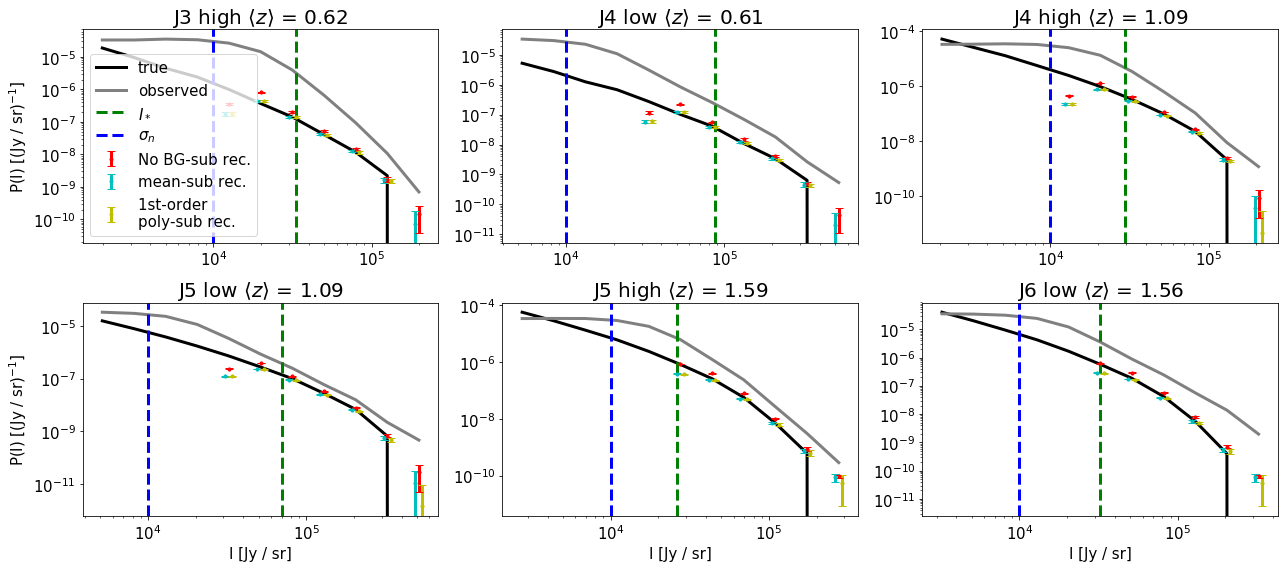

In [8]:
i = 2
sigI = sigI_arr[i]
j = 6
sig_th = sig_th_arr[j]
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))

fig, ax = plt.subplots(2,3,figsize=(18,8))

pos = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
count = 0
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)

Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))
Ipred_targ_arr0 = np.load(datadir + 'Ipred_targ_arr%d%d%d_bg0.npy'%(iNeff, i, j))
Ipred_targ_arr1 = np.load(datadir + 'Ipred_targ_arr%d%d%d_bg1.npy'%(iNeff, i, j))

for jtarg in [3,4,5,6]:
    j_idx = line_use.index(jtarg)
    idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')
    for _, (idx,z_min,z_max,name) in enumerate(zip(idx_vec, z_min_vec, z_max_vec, name_vec)):
        if count < len(pos):
            ii, jj = pos[count]
        count += 1
        hmin = np.max(Itrue_targ[j_idx, :, idx]) / 100
        hmax1 = np.max(Ipred_targ_arr[:, j_idx, :, idx])
        hmax2 = np.max(Itrue_targ[j_idx, :, idx])
        hmax = max(hmax1, hmax2)
        Ibinedges = np.arange(np.log10(hmin),np.log10(hmax) + 0.2 ,0.2)
        Ibinedges = 10**Ibinedges
        I_all = (Ibinedges[1:] + Ibinedges[:-1]) / 2
        dIbins = Ibinedges[1:] - Ibinedges[:-1]

        h_true, _ = np.histogram(Itrue_targ[j_idx, :, idx].flatten(), bins = Ibinedges)
        h_true = h_true / len(Itrue_targ[j_idx, :, idx].flatten()) / dIbins
        ax[ii][jj].plot(I_all, h_true, 'k-', lw=3, label = 'true')

        h_obs, _ = np.histogram(Iobs_all[:, idx].flatten(), bins = Ibinedges)
        h_obs = h_obs / len(Iobs_all[:, idx].flatten()) / dIbins
        ax[ii][jj].plot(I_all, h_obs, '-', lw=3, c = 'grey', label = 'observed')

        h_pred_arr = np.zeros([N_sim, len(Ibinedges) - 1])
        for n_idx in range(N_sim):
            dat_pred = Ipred_targ_arr[n_idx, j_idx, :, idx].flatten()
            h_pred, _ = np.histogram(dat_pred, bins = Ibinedges)
            h_pred = h_pred / len(dat_pred) / dIbins
            h_pred_arr[n_idx, :] = h_pred
        ax[ii][jj].errorbar(I_all, np.mean(h_pred_arr, axis = 0), \
                              np.std(h_pred_arr, axis = 0),  c = 'r', \
                              fmt = '.', capsize = 4, lw = 3, label = 'No BG-sub rec.')
        ax[ii][jj].plot(I_all, np.mean(h_pred_arr, axis = 0), 'r.', markersize=5)

        h_pred_arr = np.zeros([N_sim, len(Ibinedges) - 1])
        for n_idx in range(N_sim):
            dat_pred = Ipred_targ_arr0[n_idx, j_idx, :, idx].flatten()
            h_pred, _ = np.histogram(dat_pred, bins = Ibinedges)
            h_pred = h_pred / len(dat_pred) / dIbins
            h_pred_arr[n_idx, :] = h_pred
        ax[ii][jj].errorbar(I_all*0.95, np.mean(h_pred_arr, axis = 0), \
                              np.std(h_pred_arr, axis = 0),  c = 'c', \
                              fmt = '.', capsize = 4, lw = 3, label = 'mean-sub rec.')
        ax[ii][jj].plot(I_all*0.95, np.mean(h_pred_arr, axis = 0), 'c.', markersize=5)

        h_pred_arr = np.zeros([N_sim, len(Ibinedges) - 1])
        for n_idx in range(N_sim):
            dat_pred = Ipred_targ_arr1[n_idx, j_idx, :, idx].flatten()
            h_pred, _ = np.histogram(dat_pred, bins = Ibinedges)
            h_pred = h_pred / len(dat_pred) / dIbins
            h_pred_arr[n_idx, :] = h_pred
        ax[ii][jj].errorbar(I_all*1.05, np.mean(h_pred_arr, axis = 0), \
                              np.std(h_pred_arr, axis = 0),  c = 'y', \
                              fmt = '.', capsize = 4, lw = 3, label = '1st-order \npoly-sub rec.')
        ax[ii][jj].plot(I_all*1.05, np.mean(h_pred_arr, axis = 0), 'y.', markersize=5)

        _,I_vec_targ = Ivox_from_zsrc([[(z_min + z_max)/2]], dth, nu_binedges, line_use, [jtarg])
        ax[ii][jj].axvline(I_vec_targ[I_vec_targ!=0], c= 'g', lw=3, ls='--', label = '$I_*$')
        
        ax[ii][jj].axvline(sigI, c= 'b', ls='--', lw=3, label = '$\sigma_n$')
        ax[ii][jj].set_xscale('log')
        ax[ii][jj].set_yscale('log')
        if ii==1:
            ax[ii][jj].set_xlabel('I [Jy / sr]',fontsize = 15)
        if jj==0:
            ax[ii][jj].set_ylabel('P(I) [(Jy / sr)$^{-1}$]', fontsize = 15)
        ax[ii][jj].set_title(r'%s $\langle z \rangle$ = %.2f'\
                                         %(name, (z_min + z_max)/2), fontsize = 20)
        ax[ii][jj].tick_params(axis='both', which='major', labelsize=15)

ax[0][0].legend(loc = 3, fontsize = 15)
plt.tight_layout()
plt.savefig('plots/paperfig/gen_VID_bg.pdf', bbox_inches = 'tight', dpi = 300)

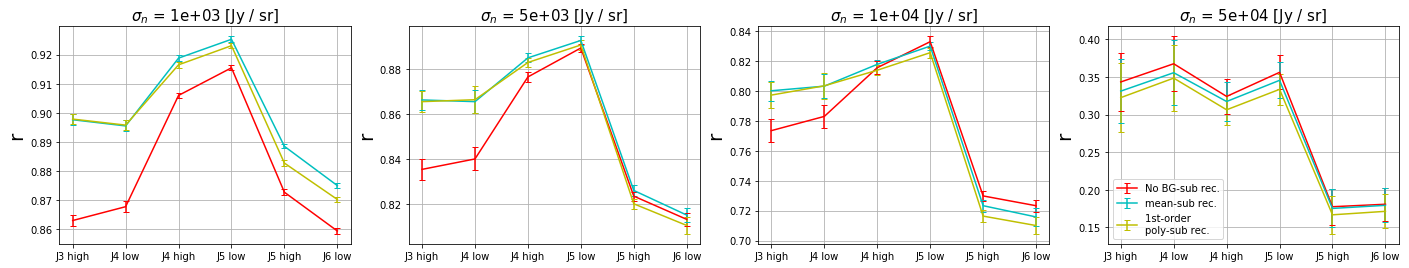

In [7]:
fig, ax = plt.subplots(1,4,figsize=(24,4))

j,sig_th = 6, sig_th_arr[6]

for i,sigI in enumerate(sigI_arr):

    Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))
    name_list = []
    mu_list = []
    sig_list = []
    for jtarg in [3,4,5,6]:
        j_idx = line_use.index(jtarg)
        idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')

        for _, (idx,name) in enumerate(zip(idx_vec, name_vec)):
            name_list.append(name)

            mapt = Itrue_targ[j_idx, :, idx]
            mapt = mapt - np.mean(mapt)
            cp_arr = np.zeros(Ipred_targ_arr.shape[0])
            for isim in range(N_sim):
                mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                mapp = mapp - np.mean(mapp)
                if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                    cp_arr[isim] = np.sum(mapt * mapp) / \
                    np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
            mu_list.append(np.mean(cp_arr))
            sig_list.append(np.std(cp_arr))
    ax[i].errorbar(np.arange(len(mu_list)),mu_list, sig_list, c = 'r', fmt = '-', capsize = 3,\
                  label = 'No BG-sub rec.')

    Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d_bg0.npy'%(iNeff, i, j))
    name_list = []
    mu_list = []
    sig_list = []
    for jtarg in [3,4,5,6]:
        j_idx = line_use.index(jtarg)
        idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')

        for _, (idx,name) in enumerate(zip(idx_vec, name_vec)):
            name_list.append(name)

            mapt = Itrue_targ[j_idx, :, idx]
            mapt = mapt - np.mean(mapt)
            cp_arr = np.zeros(Ipred_targ_arr.shape[0])
            for isim in range(N_sim):
                mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                mapp = mapp - np.mean(mapp)
                if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                    cp_arr[isim] = np.sum(mapt * mapp) / \
                    np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
            mu_list.append(np.mean(cp_arr))
            sig_list.append(np.std(cp_arr))
    ax[i].errorbar(np.arange(len(mu_list)),mu_list, sig_list, c = 'c', fmt = '-', capsize = 3,\
                  label = 'mean-sub rec.')

    Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d_bg1.npy'%(iNeff, i, j))
    name_list = []
    mu_list = []
    sig_list = []
    for jtarg in [3,4,5,6]:
        j_idx = line_use.index(jtarg)
        idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')

        for _, (idx,name) in enumerate(zip(idx_vec, name_vec)):
            name_list.append(name)

            mapt = Itrue_targ[j_idx, :, idx]
            mapt = mapt - np.mean(mapt)
            cp_arr = np.zeros(Ipred_targ_arr.shape[0])
            for isim in range(N_sim):
                mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                mapp = mapp - np.mean(mapp)
                if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                    cp_arr[isim] = np.sum(mapt * mapp) / \
                    np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
            mu_list.append(np.mean(cp_arr))
            sig_list.append(np.std(cp_arr))
    ax[i].errorbar(np.arange(len(mu_list)),mu_list, sig_list, c = 'y', fmt = '-', capsize = 3,\
                  label = '1st-order \npoly-sub rec.')

    ax[i].set_ylabel('r', fontsize = 20)
    ax[i].set_title(r'$\sigma_n$ = ' + '%.0e [Jy / sr]'%sigI, fontsize = 15)
    ax[i].set_xticks(np.arange(len(mu_list)))
    ax[i].set_xticklabels(name_list)
    ax[i].yaxis.grid()
    ax[i].xaxis.grid()
ax[i].legend(loc = 0, fontsize = 10)
plt.savefig('plots/paperfig/gen_r_bands_bg.pdf', bbox_inches = 'tight', dpi = 200)